In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('./pyfiles')
from branchCut import *

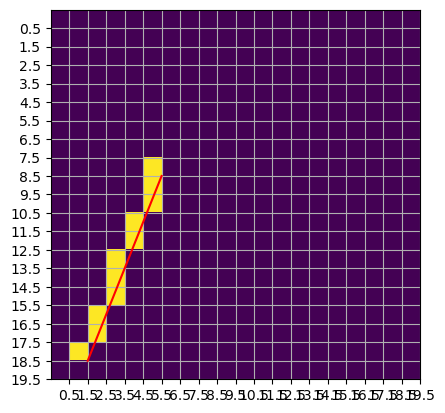

In [8]:
A = np.zeros((20,20))
i1,j1,i2,j2 = 8,5,18,1
#i1,j1,i2,j2 = 11,11,6,6
i,j = line(i1,j1,i2,j2)
#A[[i1,i2],[j1,j2]]+=2
A[i,j] += 1
plt.imshow(A)
plt.xticks(np.arange(20)+0.5)
plt.yticks(np.arange(20)+0.5)
plt.grid()
plt.plot([j1+0.5,j2+0.5],[i1+0.5,i2+0.5],'r')
plt.show()

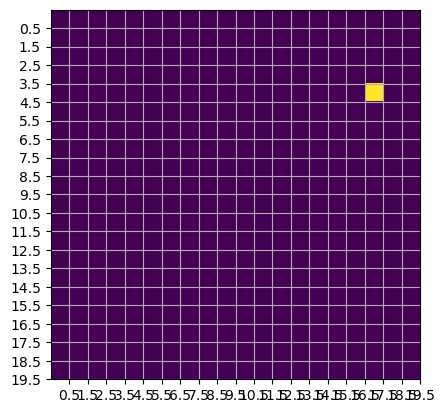

[[ 4]
 [17]]


In [266]:
i,j = 4,17
size = 5
B = np.zeros((20,20))
r = int((size-1)/2)
B[i,j] =1
#B[i-1,j-1] =1
#B[i+1,j+1]=1
plt.imshow(B)
plt.xticks(np.arange(20)+0.5)
plt.yticks(np.arange(20)+0.5)
plt.grid()
plt.show()
K = box_search(B,i,j,size)
print(K)


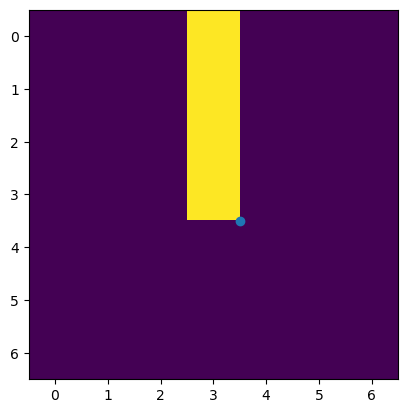

In [ ]:
H = np.zeros((7,7))
i,j=3,3
H[i,j] = 2
#H[0:i+1,j] = 1
#H[i,0:j+1] = 1
#H[i+1:,j] = 1
#H[i,j+1:] = 1
plt.imshow(H)
plt.scatter(i+0.5,j+0.5)
plt.show()

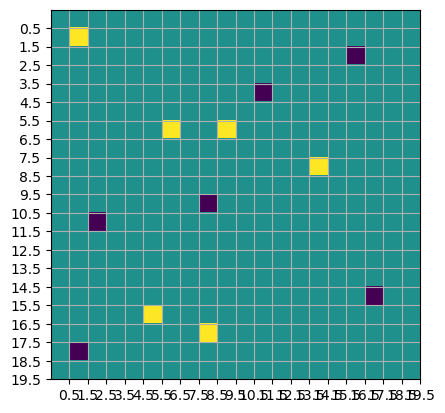

In [10]:
C = np.zeros((20,20))
C[6,6] = 1
C[10,8] = -1
C[4,11] = -1
C[6,9] =1
C[1,1] = 1
C[8,14] = 1
C[2,16] = -1
C[15,17] = -1
C[11,2] = -1
C[16,5] = 1
C[17,8] = 1
C[18,1] = -1
plt.imshow(C)
plt.xticks(np.arange(20)+0.5)
plt.yticks(np.arange(20)+0.5)
plt.grid()
plt.show()

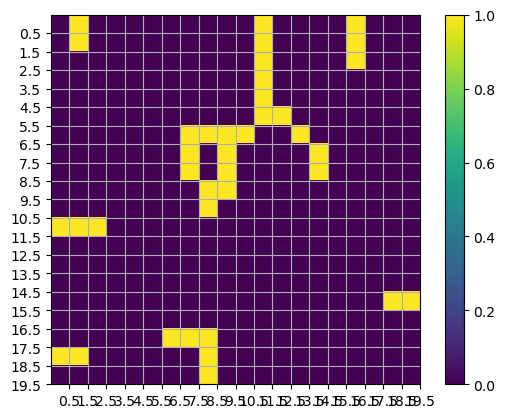

In [13]:
branch_cuts = branch_cut(C)
#found = np.array(found)

plt.imshow(branch_cuts)
plt.xticks(np.arange(20)+0.5)
plt.yticks(np.arange(20)+0.5)
plt.colorbar()
#plt.scatter(found[:,1]+0.5,found[:,0]+0.5,c='r')
plt.grid()
plt.show()
#print(found)


In [ ]:
def box_search(residue,active,charge,i,j,box_size):
    A = residue.astype(bool) & np.invert(active)
    for d in range(box_size):
        r = int((d-1)/2)
        A[]
        



In [ ]:
A = np.zeros((7,7))
C = np.ones((3,3))
B=A[0:1,:]

print(B)


In [ ]:
''' TODO
        Hold styr på eksisterende branch cuts?
'''

'''
def branch_cut(residue,max_box_size=None):

    branch_cuts = np.zeros(residue.shape).astype(bool)
    #active = np.zeros(residue.shape).astype(bool)
    #inactive = residue.astype(bool)
    balanced = np.zeros(residue.shape).astype(bool)

    if max_box_size is None:
         max_box_size = np.min(residue.size)
    
    for i in range(residue.shape[0]):
        for j in range(residue.shape[1]):

            if inactive[i,j] and not balanced[i,j]:
                inactive[i,j] = False
                charge = residue[i,j]
                box_size = 3
                m,n = i,j # Current search point
                while charge:
                    
                    while box_size <= max_box_size:
                        res_ind = box_search(inactive,m,n,box_size)
                        if res_ind:
                            m_n,n_n = res_ind[0],res_ind[1]
                            break

                        win_size+=2

                    # Place branch cut
                    i_bc,j_bc = line(m,n,m_n,n_n)
                    branch_cuts[i_bc,j_bc] = True

                    # Set found residual to active and update charge
                    inactive[m_n,n_n] = False
                    charge += residue[m_n,n_n]
                    # If edge set charge to 0 
                    m,n = m_n,n_n
                    
                balanced[i,j] = 1

    return branch_cuts
'''                






  

